In [1]:
'''
CCS592_2324-assignment1
07/04/2021
Ryan
Song Song Zi
'''


t=1
class Solution(object):
    def __init__(self, num1, num2,):
        self.num1 = num1 
        self.num2 = num2  
        self.list1, self.list2, = len(str(num1)), len(str(num2))   # Get the lengths of both numbers
        self.list = self.list1 + self.list2                        # The length of the result is the sum of the lengths of both numbers
        self.array = [0] * self.list   
        self.time_n=0
  
    def mult(self):
        num1,num2 = str(self.num1),str(self.num2)
        if num1 == '0' or num2 == '0':
            return '0'                                              # If either number is 0, the result is 0
        
        for i in reversed(range(self.list1)):                       # Iterate over each digit of the first number in reverse order
            for j in reversed(range(self.list2)):                   # Iterate over each digit of the second number in reverse order
                self.time_n+=1
                self.array[i + j + 1] += int(num1[i]) * int(num2[j])# Compute the product and store it in the array
                
                #print(num1[i], num2[j],self.array[i + j + 1],self.array)
                
        #print('-----------------------------------------------')
        
        for i in reversed(range(1, self.list)):                     # Iterate over the array in reverse to handle carries      
            self.time_n+=1
            self.array[i - 1] += self.array[i] // 10                # Here, '//' is used for integer division, which correctly calculates the quotient.      
            self.array[i] %= 10                                     # Modulo operation to get the remainder
            
            #print(self.array)  
        
        
        return [self.array,self.time_n]

    def karatsuba(self, num1, num2):
        
        if len(str(num1)) == 1 or len(str(num2)) == 1:               # Base case: If either number is single-digit, return their product
            return num1 * num2
        else:
            
            max_n = max(len(str(num1)), len(str(num2)))              # Calculate the maximum number of digits among the two numbers         
            div2_n = max_n // 2                                      # Calculate the number of digits to divide by 2
            a, b = num1 // 10**(div2_n), num1 % 10**(div2_n)         # num1 = a*10**(n/2)+b
            c, d = num2 // 10**(div2_n), num2 % 10**(div2_n)         # num2 = c*10**(n/2)+d                                              
            ac_mul, bd_mul = self.karatsuba(a, c), self.karatsuba(b, d)
            ad_bc_mul = self.karatsuba(a + b, c + d) - ac_mul - bd_mul# Recursively compute ac, bd, and (a+b)(c+d)
           
                                                                      # num1*num2 = ac*10**(n)+(ad+bc)*10**(n/2)+bd
            res = ac_mul * 10**(2 * div2_n) + ad_bc_mul * 10**(div2_n) + bd_mul
            self.time_n+=1
            global t
            t=self.time_n
            return res

        
    def array_to_stringNumber(self,array):                          #array to str number
        res = ''                                                    # Store the result
        pos = 0                                                    
        if self.array[pos] == 0:                                    # Skip leading zeros in the result
            pos += 1
        while pos < self.list:
            res = res + str(self.array[pos])                        # Convert the digits to strings and concatenate them
            #print(res)
            pos += 1
        return res                                           

number,time=0,0


if __name__ == '__main__':
    num1, num2 = 10, 91                             
    native_s = Solution(num1, num2)
    arraynumber=native_s.mult()
    #print(arraynumber)
    if num1=='0' or num2=='0':
        print(int(native_s.array_to_stringNumber(arraynumber[0])))
    else:
        number,time=int(native_s.array_to_stringNumber(arraynumber[0])),arraynumber[1]
    num3, num4 = 12111, 1111111                     
    karatsuba_s = Solution(num3, num4)
    karatsuba_number=karatsuba_s.karatsuba(num3, num4)
    print(t)
    print(karatsuba_number)
print(number,time)



10
13456665321
910 7


[5, 6, 6, 5, 6, 6]
[10, 14, 14, 10, 14, 14]


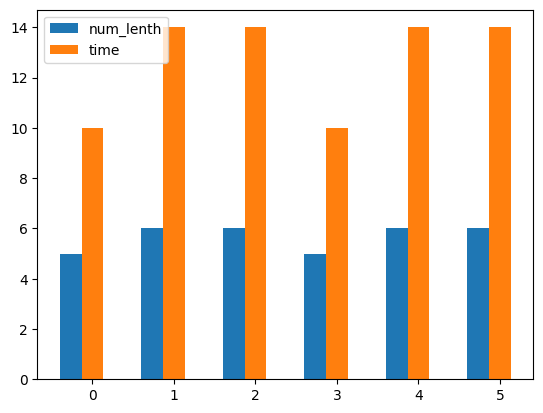

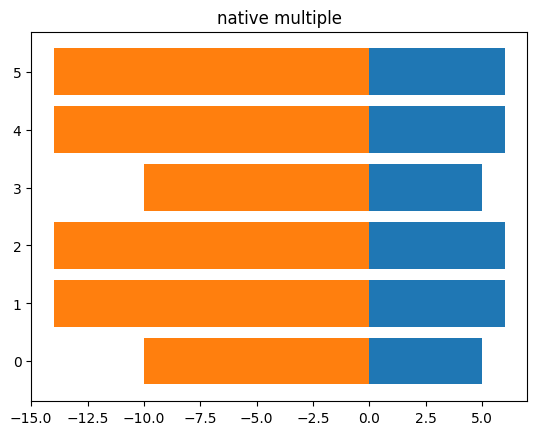

In [2]:
#native multiple
import random
list_num_1_2 =[]
list_time=[]
array_times=6

for i in range(array_times):
    num1 = random.randint(1,1000)
    num2 = random.randint(1,1000)

    native_s = Solution(num1, num2)
    native_s_number=native_s.mult()
    time=native_s_number[1]
    list_time.append(time)
    len_num_1_2=len(str(num1))+len(str(num2))
    list_num_1_2.append(len_num_1_2)
    
print(list_num_1_2)
print(list_time)

import numpy as np
import matplotlib.pyplot as plt

size = array_times
x = np.arange(size)
a = np.array(list_num_1_2)
b = np.array(list_time)


total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='num_lenth')
plt.bar(x + width, b, width=width, label='time')

plt.legend()
plt.show()

plt.barh(range(len(a)), a)
plt.barh(range(len(b)), -b)
plt.title('native multiple')
plt.show()

[6, 6, 6, 5, 6, 6]
[3, 3, 4, 2, 5, 3]


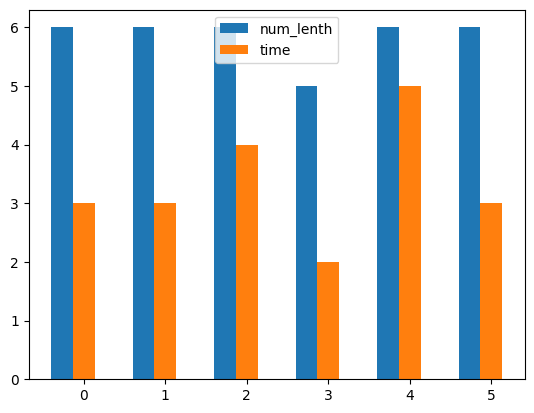

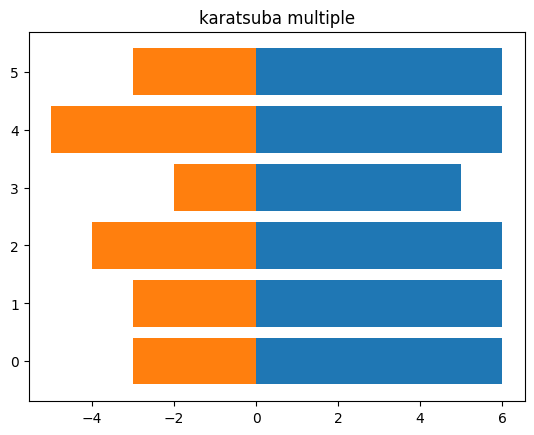

In [3]:
import random
list_num_1_2 =[]
list_time=[]
array_times=6


for i in range(array_times):
    t=0
    num1 = random.randint(1,1000)
    num2 = random.randint(1,1000)

    karatsuba_s = Solution(num1, num2)
    karatsuba_s_number=karatsuba_s.karatsuba(num1,num2)
    time=t
    list_time.append(time)
    len_num_1_2=len(str(num1))+len(str(num2))
    list_num_1_2.append(len_num_1_2)
    
print(list_num_1_2)
print(list_time)

import numpy as np
import matplotlib.pyplot as plt

size = array_times
x = np.arange(size)
a = np.array(list_num_1_2)
b = np.array(list_time)


total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='num_lenth')
plt.bar(x + width, b, width=width, label='time')

plt.legend()
plt.show()

plt.barh(range(len(a)), a)
plt.barh(range(len(b)), -b)
plt.title('karatsuba multiple')
plt.show()

[14, 14, 14, 10, 14, 14]
[4, 3, 3, 2, 5, 3]


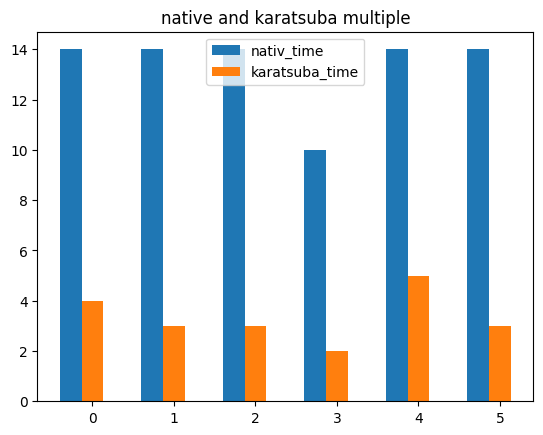

In [4]:
import random
nativ_time =[]
karatsuba_time=[]
array_times=6


for i in range(array_times):
    t=1
    num1 = random.randint(0,1000)
    num2 = random.randint(0,1000)

    karatsuba_s = Solution(num1, num2)
    karatsuba_s_number=karatsuba_s.karatsuba(num1,num2)

    native_s = Solution(num1, num2)
    native_s_number=native_s.mult()
    

    nativ_time.append(native_s_number[1])
    karatsuba_time.append(t)
    
print(nativ_time)
print(karatsuba_time)

import numpy as np
import matplotlib.pyplot as plt

size = array_times
x = np.arange(size)
a = np.array(nativ_time)
b = np.array(karatsuba_time)


total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='nativ_time')
plt.bar(x + width, b, width=width, label='karatsuba_time')

plt.legend()
plt.title('native and karatsuba multiple')
plt.show()

